<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [4]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


### Step 2: Import necessary libraries and load the dataset


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

### Load the data


In [6]:
df = pd.read_csv("survey-data.csv")

In [25]:
conn = sqlite3.connect(':memory:')
df.to_sql("main", conn, if_exists="replace", index=False)

65437

### Display the first few rows of the data to understand its structure


In [7]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



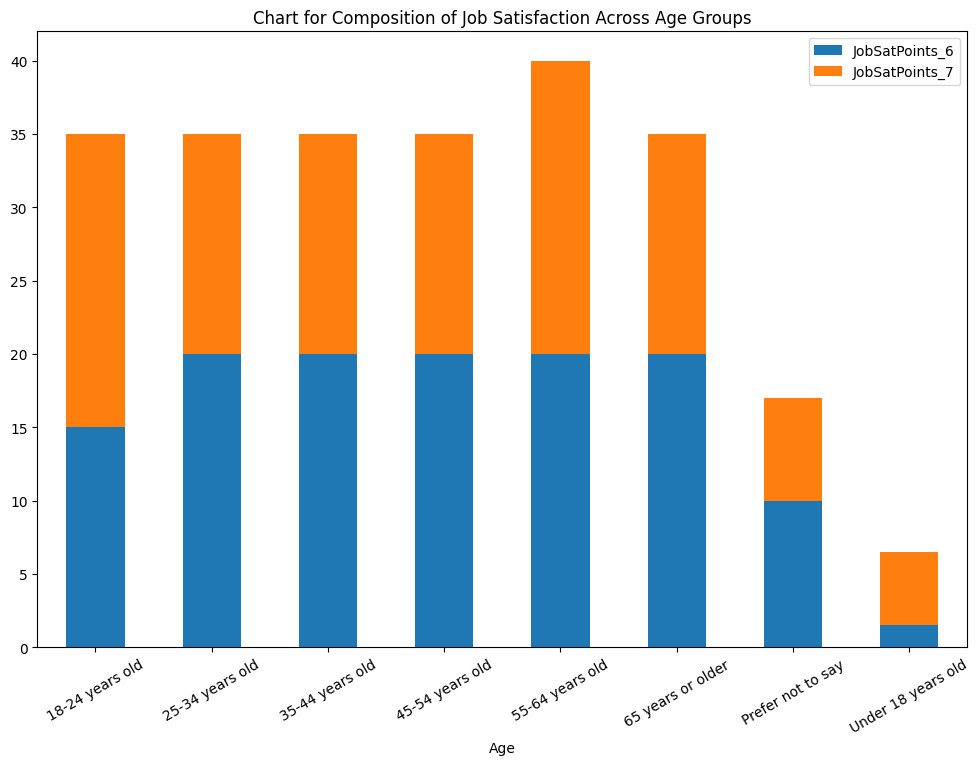

In [21]:
##Write your code here
js=df[['JobSatPoints_6','JobSatPoints_7', 'Age']].dropna()
median=js.groupby('Age')[['JobSatPoints_6','JobSatPoints_7']].median()

median.plot(
    kind='bar',
    stacked=True,
    figsize=(12,8)
)
plt.title('Chart for Composition of Job Satisfaction Across Age Groups')
plt.xticks(rotation=30)
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


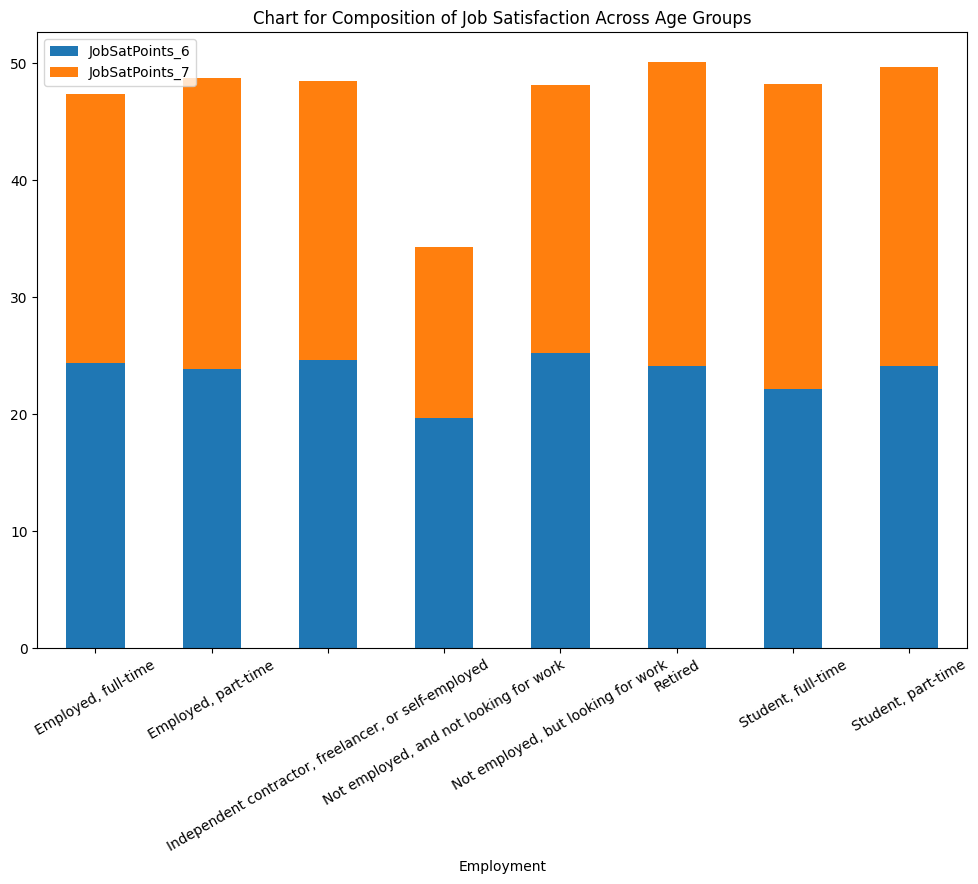

In [20]:
##Write your code here
ejs=df[['Employment', 'JobSatPoints_6','JobSatPoints_7']].dropna()
ejs.loc[:,'Employment']=ejs['Employment'].str.split(';')
ejs=ejs.explode('Employment')
e_group=ejs.groupby('Employment')[['JobSatPoints_6','JobSatPoints_7']].mean()

e_group.plot(
    kind='bar',
    stacked=True,
    figsize=(12,8)
)
plt.title('Chart for Composition of Job Satisfaction Across Age Groups')
plt.xticks(rotation=30)
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


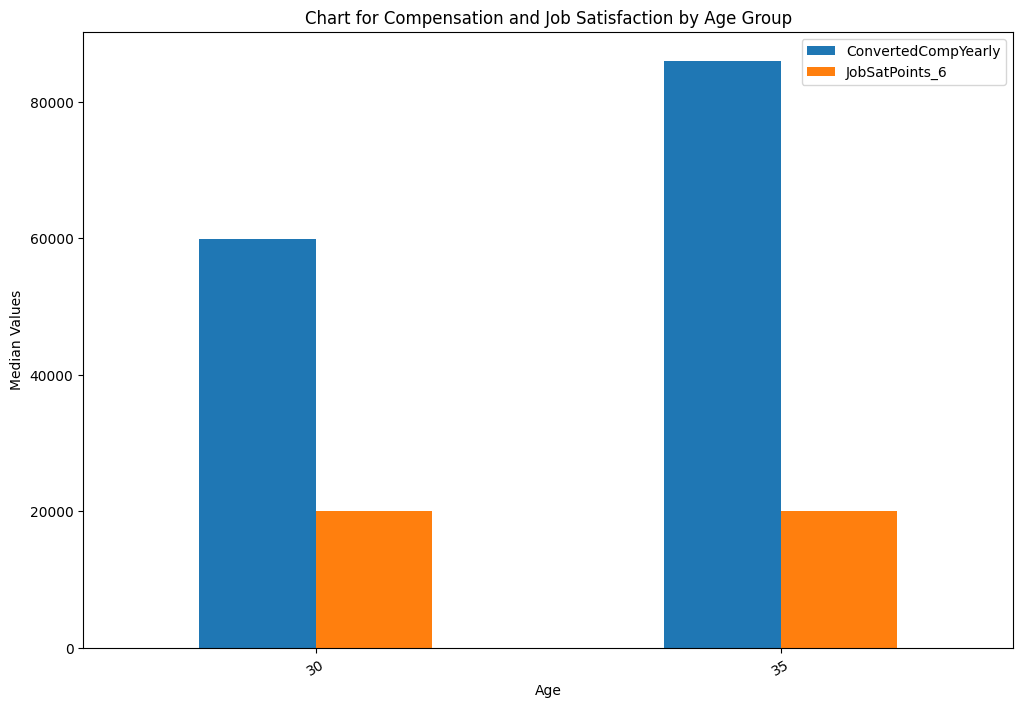

In [50]:
##Write your code here
Qu1="""
select Age, ConvertedCompYearly, JobSatPoints_6
from main
where Age between 20 and 36

"""
ca=pd.read_sql_query(Qu1,conn)
ca = ca[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()
maping={
    '25-34 years old': 30,
    '35-44 years old': 35
}
ca['Age']=ca['Age'].map(maping)
median_age = ca.groupby('Age')[['ConvertedCompYearly','JobSatPoints_6']].median()

median_age['JobSatPoints_6'] = median_age['JobSatPoints_6'] * 1000

median_age.plot(
    kind='bar',
    figsize=(12,8)
)
plt.title('Chart for Compensation and Job Satisfaction by Age Group')
plt.xlabel('Age')
plt.ylabel('Median Values')
plt.xticks(rotation=30)
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


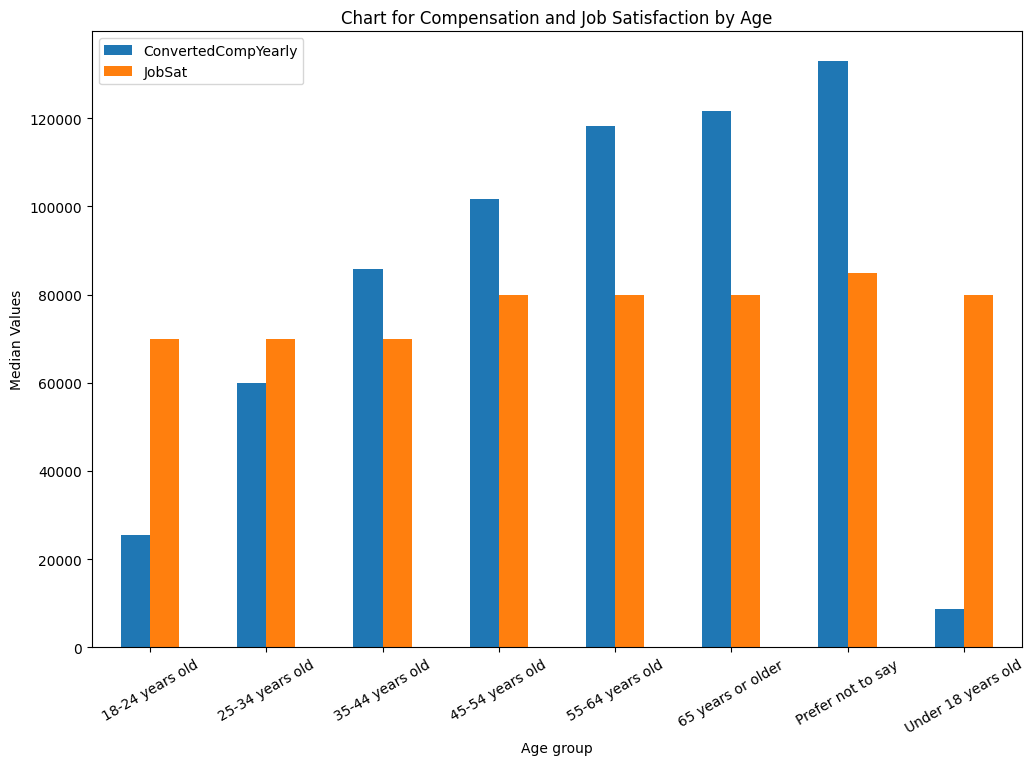

In [48]:
##Write your code here
c_a = df[['Age', 'ConvertedCompYearly', 'JobSat']].dropna()
med_group=c_a.groupby('Age')[['ConvertedCompYearly', 'JobSat']].median()

med_group['JobSat'] = med_group['JobSat'] * 10000

med_group.plot(
    kind='bar',
    figsize=(12,8)
)
plt.title('Chart for Compensation and Job Satisfaction by Age')
plt.xlabel('Age group')
plt.ylabel('Median Values')
plt.xticks(rotation=30)
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


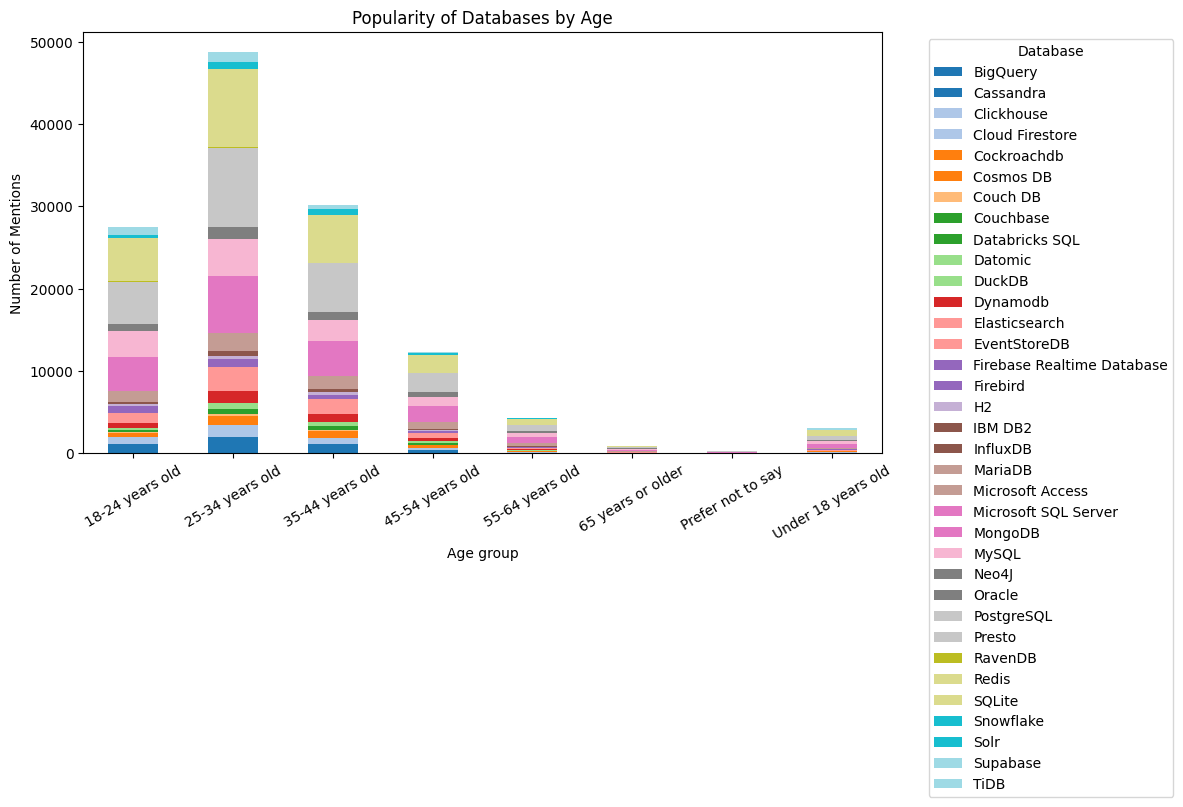

In [69]:
##Write your code here
db=df[['DatabaseWantToWorkWith', 'Age']].dropna()
db.loc[:,'DatabaseWantToWorkWith']=db['DatabaseWantToWorkWith'].str.split(';')
db=db.explode('DatabaseWantToWorkWith')

table = db.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack()

table.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    colormap='tab20'
)

plt.title('Popularity of Databases by Age')
plt.xlabel('Age group')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=30)
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


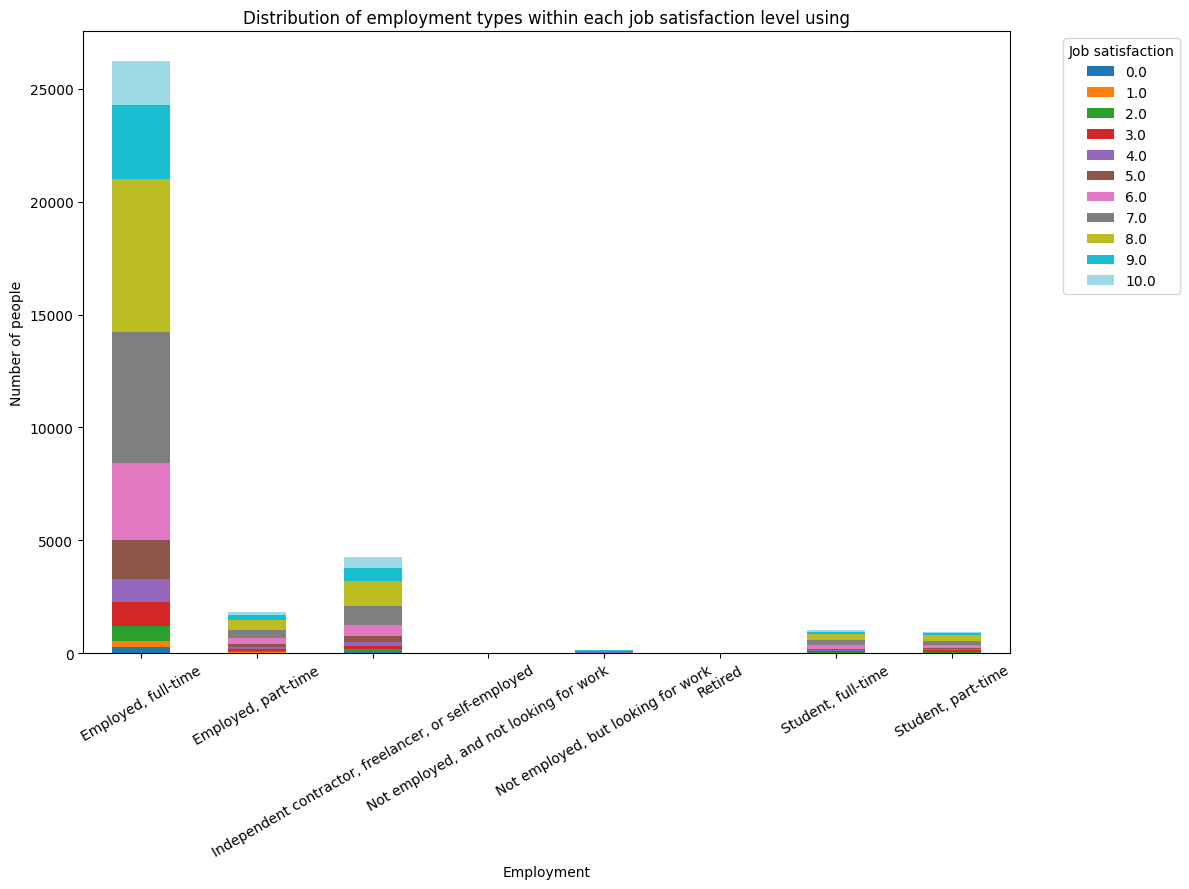

In [83]:
##Write your code here
e_sat=df[['Employment','JobSat']].dropna()
e_sat.loc[:,'Employment']=e_sat['Employment'].str.split(';')
e_sat=e_sat.explode('Employment')
je=e_sat.groupby(['Employment','JobSat']).size().unstack()

je.plot(
    kind='bar',
    stacked=True,
    figsize=(12,9),
    colormap='tab20'
)
plt.title('Distribution of employment types within each job satisfaction level using')
plt.xlabel('Employment')
plt.ylabel('Number of people')
plt.xticks(rotation=30)
plt.legend(title='Job satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


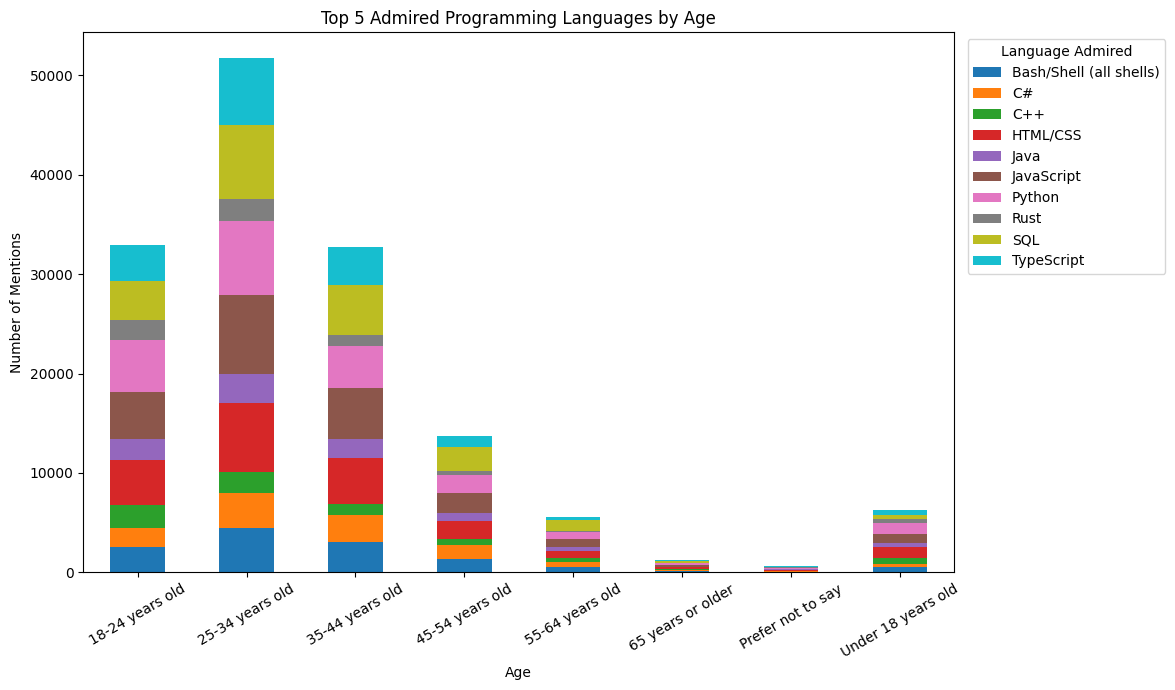

In [103]:
##Write your code here
la=df[['LanguageAdmired','Age']].dropna()
la.loc[:,'LanguageAdmired']=la['LanguageAdmired'].str.split(';')
la=la.explode('LanguageAdmired')
top10=la['LanguageAdmired'].value_counts().head(10).index
top10=la[la['LanguageAdmired'].isin(top10)]
gr=top10.groupby(['Age','LanguageAdmired']).size().unstack()

gr.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7)
)
plt.legend(title='Language Admired', loc= 'upper right', bbox_to_anchor=(1.25,1))
plt.title('Top 5 Admired Programming Languages by Age')
plt.xlabel('Age')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
    

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


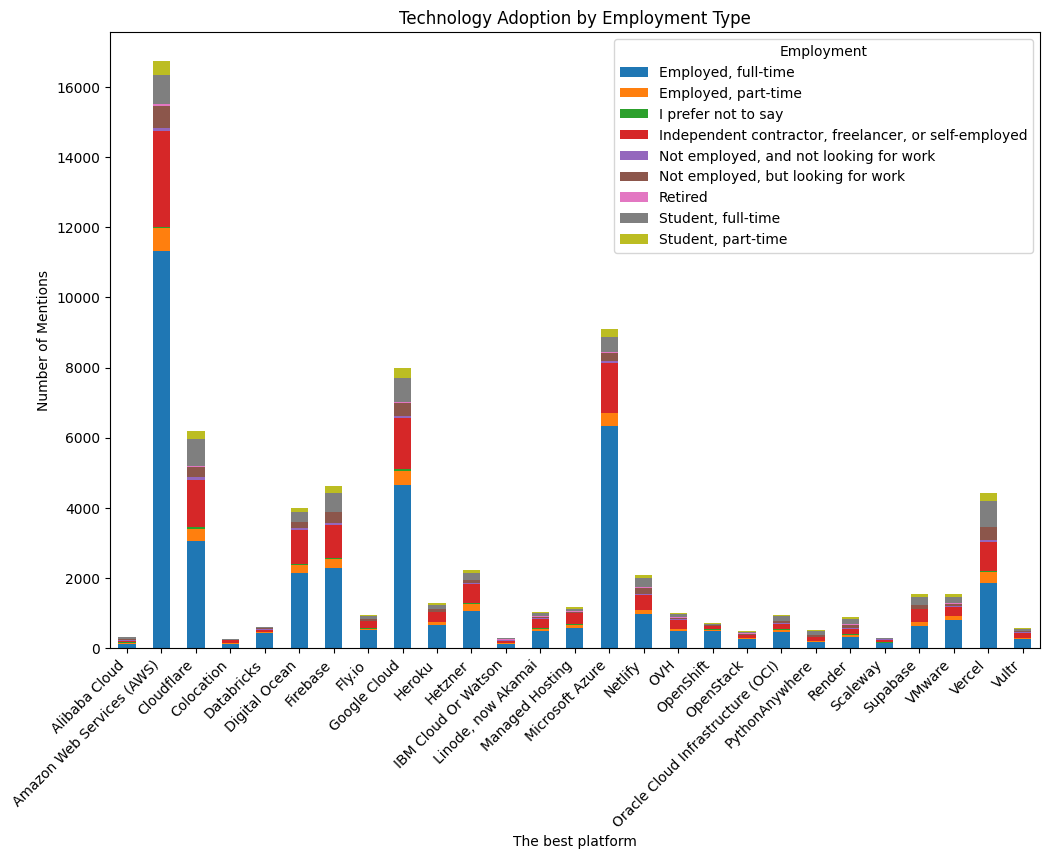

In [117]:
##Write your code here
pl=df[['PlatformAdmired','Employment']].dropna()
pl[['PlatformAdmired', 'Employment']] = pl[['PlatformAdmired', 'Employment']].apply(lambda x:x.str.split(';'))
pl=pl.explode('PlatformAdmired')
pl=pl.explode('Employment')
best_pl=pl.groupby(['PlatformAdmired', 'Employment']).size().unstack()

best_pl.plot(
    kind='bar',
    stacked=True,
    figsize=(12,8)
)
plt.title('Technology Adoption by Employment Type')
plt.xlabel('The best platform')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45,ha='right')
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
